# Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wg
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive
from IPython.display import display

%matplotlib inline

# jupyter nbextension enable --py widgetsnbextension --sys-prefix
# restart jupyter notebook

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187.571423,109.720985
1,177.932531,91.089773
2,180.828194,88.931941
3,177.443353,89.389764
4,177.726095,92.017167
5,183.039398,94.701778
6,178.591704,83.571541
7,177.190641,85.190049
8,183.426189,92.958129
9,188.509735,108.213194


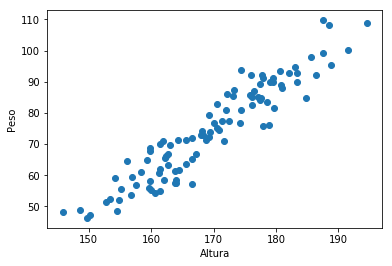

In [43]:
x = df.Altura
y = df.Peso

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [37]:
def plot_line(w, b):
    plt.figure(0, figsize=(20,4))
    plt.subplot(1,3,3)
    plt.scatter(x, y)
    y_pred = w*x + b
    plt.plot(x, y_pred)
    plt.xlim(140, 210)
    plt.ylim(40, 120)
    
    plt.subplot(1,3,2)
    x_ = np.array([0, x.max()])
    y_ = w*x_ + b
    plt.scatter(x, y)
    plt.plot(x_, y_)
    plt.xlim(0, 210)
    plt.ylim(-160, 120)
    
    plt.subplot(1,3,1)
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    loss.append(rmse)
    plt.plot(loss)
    plt.title('Loss')
    
    plt.show()

In [38]:
loss = []

interactive_plot = interactive(plot_line, w=(1, 1.5, 0.01), b=(-200, 0, 1))
output = interactive_plot.children[-1]
output.layout_height = '350px'
interactive_plot

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.values.reshape(-1,1), y)
print(reg.coef_, reg.intercept_)

[ 1.36964264] -157.843905517


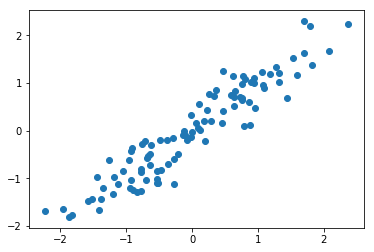

In [75]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_std = std.fit_transform(x.values.reshape(-1,1))
y_std = std.fit_transform(y.values.reshape(-1,1))

plt.scatter(x_std, y_std)

In [76]:
def plot_line_(w, b):
    plt.figure(0, figsize=(20,4))
    plt.subplot(1,2,2)
    plt.scatter(x_std, y_std)
    y_pred = w*x_std + b
    plt.plot(x_std, y_pred)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
    plt.subplot(1,2,1)
    rmse = np.sqrt(np.mean((y_std - y_pred)**2))
    loss.append(rmse)
    plt.plot(loss)
    plt.title('Loss')
    
    plt.show()

In [85]:
loss = []

interactive_plot = interactive(plot_line_, w=(-1, 1, 0.05), b=(-2, 4, 0.5))
output = interactive_plot.children[-1]
output.layout_height = '350px'
interactive_plot

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_std.reshape(-1,1), y_std)
print(reg.coef_, reg.intercept_)

[[ 0.94262736]] [ -5.70529042e-16]


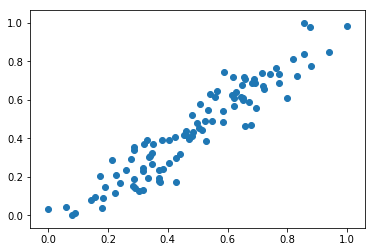

In [63]:
from sklearn.preprocessing import MinMaxScaler

std = MinMaxScaler()
x_std = std.fit_transform(x.values.reshape(-1,1))
y_std = std.fit_transform(y.values.reshape(-1,1))

plt.scatter(x_std, y_std)

In [65]:
def plot_line_2(w, b):
    plt.figure(0, figsize=(20,4))
    plt.subplot(1,2,2)
    plt.scatter(x_std, y_std)
    y_pred = w*x_std + b
    plt.plot(x_std, y_pred)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.subplot(1,2,1)
    rmse = np.sqrt(np.mean((y_std - y_pred)**2))
    loss.append(rmse)
    plt.plot(loss)
    plt.title('Loss')
    
    plt.show()

In [72]:
loss = []

interactive_plot = interactive(plot_line_2, w=(-1.5, 1.5, 0.05), b=(-1, 1, 0.01))
output = interactive_plot.children[-1]
output.layout_height = '350px'
interactive_plot

In [69]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_std.reshape(-1,1), y_std)
print(reg.coef_, reg.intercept_)

[[ 1.05343716]] [-0.07048535]
